# Digit Recognition 

In this notebook, we will explore potencially one of the most popular datasets available on Kaggle: the Digit Recognition. We are given records of 28x28 pixel images that represent drawings of numbers and their respective labels. Each feature displays the intensity of the pixel in the Greyscale.

Our objective is to use this data to create a model capable of classifying unlabeled images.

# Loading dataset 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

pd.set_option('display.width', 1000)
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.describe()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
count,42000.000000,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,42000.0,...,42000.000000,42000.000000,42000.000000,42000.00000,42000.000000,42000.000000,42000.0,42000.0,42000.0,42000.0
mean,4.456643,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.219286,0.117095,0.059024,0.02019,0.017238,0.002857,0.0,0.0,0.0,0.0
std,2.887730,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,6.312890,4.633819,3.274488,1.75987,1.894498,0.414264,0.0,0.0,0.0,0.0
min,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
25%,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
50%,4.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
75%,7.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.0
max,9.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,254.000000,254.000000,253.000000,253.00000,254.000000,62.000000,0.0,0.0,0.0,0.0


# Visualizing Images 

Since the drawings are handmade, we can have an idea of problems we may come across by visualizing samples of the images we have. On the digits we plotted, we can see that, depending on the handwriting, the number three and the number five can be easily confused with the number nine.

Luckily, we have 42k records to build a model, and hopefully, they will be enough to generalize the traits.

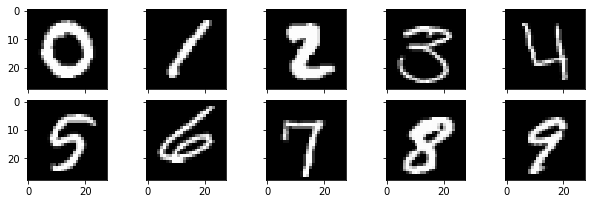

In [4]:
sample_digits = df.drop_duplicates(subset='label')

fig, axs = plt.subplots(2, 5, figsize=(10,5))
plt.subplots_adjust(wspace=.5, hspace=-.5)

count = -1
for i in range(2):
    for j in range(5):
        count += 1
        axs[i, j].imshow(sample_digits[sample_digits['label'] == count].drop(columns='label').values.reshape(28, 28), cmap='gray')

# Share axis
for ax in fig.get_axes():
    ax.label_outer()
    ax

# Checking for data balance

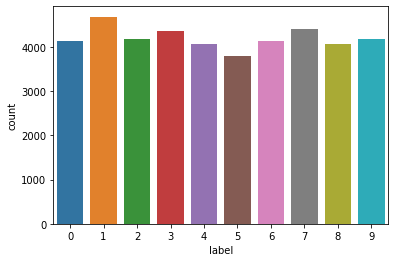

In [5]:
sns.countplot(x='label', data=df)

# Normalizing inputs 

Even though features are already normalized, with values ranging between 0 and 255, we will be scaling them with MinMaxScaler for model performance. After the procedure, values will range between 0 and 1.

In [6]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

X = df.drop(columns='label')
y = df['label']

normalized_df = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)
normalized_df['label'] = y

# Cross Validating 

Since the dataset is quite substancial, with 42k records and 785 columns, we will perform the cross validation with a subset of the original data, so that we can accomplish it faster. We don't expect a trastic variation in model performance because of the sampling. 

We will sample 1k records of each label to maintain data balance. Performance will be measured based on accuracy.

In [10]:
cv_df = pd.DataFrame()

for label in df['label'].unique():
    aux = normalized_df[normalized_df['label'] == label].head(1000)
    cv_df = cv_df.append(aux)

X_cv = cv_df.drop(columns='label')
y_cv = cv_df['label']

LogisticRegression
RandomForestClassifier
LinearSVC
KNeighborsClassifier
BernoulliNB


(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

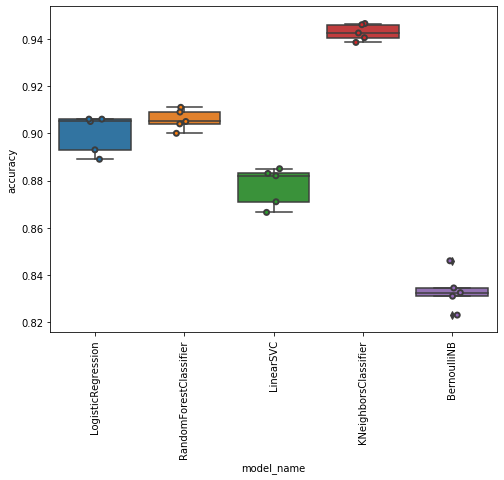

In [11]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import BernoulliNB


models = [
    LogisticRegression(),
    RandomForestClassifier(),
    LinearSVC(),
    KNeighborsClassifier(),
    BernoulliNB()
]

agg = []

for model in models:
    model_name = model.__class__.__name__
    print (model_name)
    scores = cross_val_score(model, X_cv, y_cv, cv=5, scoring='accuracy')
    for score in scores:
        agg.append([model_name, score])

cv_df = pd.DataFrame(agg, columns=['model_name', 'accuracy'])

plt.figure(figsize=(8,6))
sns.boxplot(x='model_name', y='accuracy', data=cv_df)
sns.stripplot(x='model_name', y='accuracy', data=cv_df, size=5, linewidth=2)
plt.xticks(rotation=90)

# Modeling and Performance Measurement

Observing the results, we can see that KNN had the best performance. Thus, it will be the model we will choose to build. Overall accuracy revolves around 0.95, but since we're going to be training with a lot more data, we should expect slightly higher performance. We won't be looking at hyperparameter tunning in this project.

It is worth noting that because it is a distance-based algorithm, KNN might not be the optimal choice to deploy in production. Since it must calculate the similarity between the new entry and every record from the training data to determine the K smallest, the prediction may take a while.

In [12]:
from sklearn.model_selection import train_test_split

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=51)

clf = KNeighborsClassifier()
clf.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [14]:
y_test = pd.DataFrame(y_test, columns=['label'])
y_train = pd.DataFrame(y_train, columns=['label'])

## Checking data balance in the training and testing subsets 

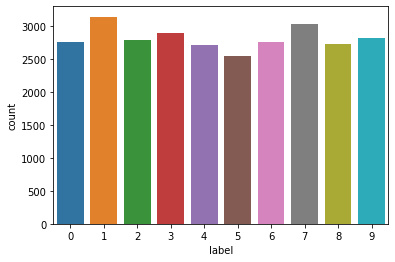

In [15]:
sns.countplot(x='label', data=y_train)

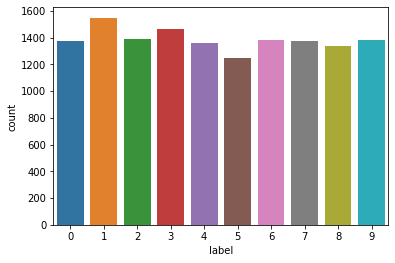

In [16]:
sns.countplot(x='label', data=y_test)

In [17]:
y_pred = clf.predict(X_test)

In [18]:
y_pred

array([9, 2, 8, ..., 7, 5, 3])

In [19]:
from sklearn.metrics import accuracy_score, confusion_matrix

In [20]:
acc_score = accuracy_score(y_test, y_pred)
print (acc_score)

0.9641414141414142


Text(0.5, 33.0, 'Predicted')

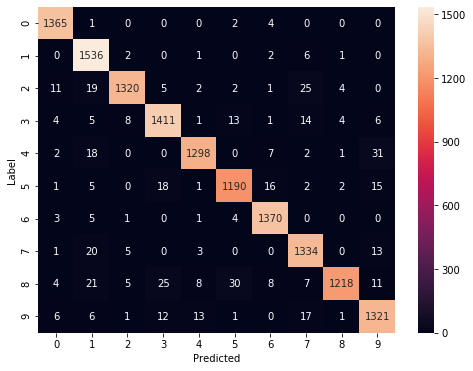

In [21]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
ax = sns.heatmap(conf_matrix, fmt='d', annot=True)
bottom, top = ax.get_ylim()
ax.set_ylim(bottom + 0.5, top - 0.5)
plt.ylabel('Label')
plt.xlabel('Predicted')

# Conclusion 

In this project, we were able to build a very decent model to classify handwritten numbers. We disposed of a substancial dataset whose records were diverse enough to generalize the traits of each digit.